<a href="https://colab.research.google.com/github/jvcamacho1/QConcursos-SigmaGeek/blob/main/QConcursos_SigmaGeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1- Understading the Data
Looking for unique values in the data, for future classification and normalization

In [ ]:
def is_unique(s):
    a = s.to_numpy()
    return (a[0] == a).all()

In [ ]:
df_model = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/Dataset_model.csv')
df_model.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2000000, 32)

In [ ]:
df_model.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398
3,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489397
4,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,E,2.0,489396


In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/Submit.csv',on_bad_lines='skip')
submit
submit.shape

(16053, 1)

In [ ]:
subject_questions = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/subjects_questions.csv')
subject_questions.shape
subject_questions.head()

,subject_id,novo_question_id
0,14655.0,15
1,19271.0,15
2,14655.0,16
3,19271.0,16
4,14655.0,17


In [ ]:
df_model.columns

Index(['novo_user_id', 'city', 'country', 'device', 'device_type', 'os',
       'platform', 'region', 'gp:carrers', 'gp:college type',
       'gp:degree course', 'gp:previous experience', 'gp:school type',
       'gp:segment', 'gp:source_project', 'acertou', 'created_at', 'row',
       'commented_by_professor', 'difficulty', 'discipline_id',
       'examining_board_id', 'institute_id', 'knowledge_area_id',
       'modality_id', 'nullified', 'outdated', 'product_id',
       'publication_year', 'right_answer', 'scholarity_id',
       'novo_question_id'],
      dtype='object')

In [ ]:
df_model.nunique()

novo_user_id                20000
city                         1799
country                        18
device                        217
device_type                   394
os                            231
platform                        3
region                         50
gp:carrers                   1451
gp:college type                 2
gp:degree course               16
gp:previous experience          4
gp:school type                  6
gp:segment                      4
gp:source_project               2
acertou                         2
created_at                1956537
row                           100
commented_by_professor          2
difficulty                      5
discipline_id                 225
examining_board_id            580
institute_id                 3099
knowledge_area_id              94
modality_id                     2
nullified                       2
outdated                        2
product_id                      5
publication_year               23
right_answer  

In [ ]:
unique_values= dict()

for col in df_model:
    unique_values[col] = df_model[col].unique()

In [ ]:
unique_values['created_at']

array(['2022-03-20 10:06:06', '2022-03-20 10:08:25',
       '2022-03-20 10:09:49', ..., '2022-08-11 01:19:05',
       '2022-08-11 01:20:20', '2022-08-11 01:20:46'], dtype=object)

In [ ]:
unique_values['gp:college type']

array([nan, '["Pública"]', '["Privada"]'], dtype=object)

In [ ]:
unique_values['gp:school type']

array([nan, '["Escola Pública"]', '["Estudo por conta própria"]',
       '["Cursinho Preparatório"]', '["Escola Privada"]',
       '["Escola Privada","Escola Pública"]',
       '["Estudo por conta própria","Cursinho Preparatório"]'],
      dtype=object)

In [ ]:
unique_values['gp:degree course']

array([nan, '["ADMINISTRACAO"]',
       '["ADMINISTRACAO","ANALISE E DESENVOLVIMENTO DE SISTEMAS"]',
       '["QUIMICA"]', '["JORNALISMO"]',
       '["ANALISE E DESENVOLVIMENTO DE SISTEMAS"]',
       '["CIENCIAS CONTABEIS"]',
       '["ADMINISTRACAO","PEDAGOGIA","LETRAS - LINGUA PORTUGUESA"]',
       '["DIREITO"]', '["MEDICINA"]',
       '["ANALISE E DESENVOLVIMENTO DE SISTEMAS","ADMINISTRACAO PUBLICA"]',
       '["ODONTOLOGIA"]', '["GESTAO DE SEGURANCA PRIVADA"]',
       '["ENFERMAGEM","MEDICINA","ODONTOLOGIA"]',
       '["CIENCIAS BIOLOGICAS"]', '["RELACOES INTERNACIONAIS","DIREITO"]',
       '["ENFERMAGEM"]'], dtype=object)

In [ ]:
unique_values['difficulty']

array([ 4.,  3.,  1.,  2.,  5., nan])

In [ ]:
unique_values['gp:previous experience']

array(['beginner', nan, 'professional', 'highly_experient', 'experient'],
      dtype=object)

In [ ]:
unique_values['gp:carrers']

array(['Tribunal, Administrativa', 'Tribunal',
       'Controle e Gestão, Outras, Administrativa', ...,
       'Fiscal, Legislativa, Administrativa, Controle e Gestão',
       'Fiscal, Controle e Gestão, Administrativa, Outras, Legislativa',
       'Administrativa, Legislativa, Tribunal, Fiscal, Bancária, Policial, Outras'],
      dtype=object)

In [ ]:
unique_values['gp:segment']

array(['Concurso Público', nan, 'Concurso Militar', 'OAB', 'Enem'],
      dtype=object)

##2-Cleanning The Data
Removing unnecessary columns and filling Nan Values with 0

In [ ]:
for col in df_model:
  df_model[col] = df_model[col].fillna(0)

In [ ]:
df_model.drop(df_model[df_model['nullified'] == 1.0].index, inplace=True)

KeyError: ignored

In [ ]:
df_model = df_model.drop('novo_user_id', axis=1)
df_model = df_model.drop('city', axis=1)
df_model = df_model.drop('country', axis=1)
df_model = df_model.drop('device', axis=1)
df_model = df_model.drop('gp:carrers', axis=1)
df_model = df_model.drop('device_type', axis=1)
df_model = df_model.drop('os', axis=1)
df_model = df_model.drop('gp:source_project', axis=1)

In [ ]:
df_model = df_model.drop('created_at', axis=1)
df_model = df_model.drop('outdated', axis=1)
df_model = df_model.drop('nullified', axis=1)
df_model = df_model.drop('product_id', axis=1)
df_model = df_model.drop('publication_year', axis=1)
df_model = df_model.drop('row', axis=1)
df_model = df_model.drop('examining_board_id', axis=1)
df_model = df_model.drop('right_answer', axis=1)


##3- Normalizing the data
Labeling string values

In [ ]:
df_resposta=df_model['acertou']
df_model = df_model.drop('acertou', axis=1)

In [ ]:
df_model

,platform,region,gp:college type,gp:degree course,gp:previous experience,gp:school type,gp:segment,commented_by_professor,difficulty,discipline_id,institute_id,knowledge_area_id,modality_id,scholarity_id,novo_question_id
0,iOS,Rio de Janeiro,0,0,beginner,0,Concurso Público,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489400
1,iOS,Rio de Janeiro,0,0,beginner,0,Concurso Público,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489399
2,iOS,Rio de Janeiro,0,0,beginner,0,Concurso Público,0.0,3.0,238.0,4126.0,13.0,1.0,2.0,489398
3,iOS,Rio de Janeiro,0,0,beginner,0,Concurso Público,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489397
4,iOS,Rio de Janeiro,0,0,beginner,0,Concurso Público,0.0,3.0,238.0,4126.0,13.0,1.0,2.0,489396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,iOS,Sao Paulo,0,0,beginner,0,Concurso Público,0.0,2.0,185.0,6901.0,27.0,1.0,3.0,433505
1999996,iOS,Sao Paulo,0,0,beginner,0,Concurso Público,0.0,1.0,185.0,6901.0,27.0,1.0,3.0,432606
1999997,iOS,Sao Paulo,0,0,beginner,0,Concurso Público,0.0,2.0,185.0,6901.0,27.0,1.0,3.0,432605
1999998,iOS,Sao Paulo,0,0,beginner,0,Concurso Público,0.0,3.0,185.0,3270.0,27.0,1.0,3.0,430934


In [ ]:
df_model.columns

Index(['platform', 'region', 'gp:college type', 'gp:degree course',
       'gp:previous experience', 'gp:school type', 'gp:segment',
       'commented_by_professor', 'difficulty', 'discipline_id', 'institute_id',
       'knowledge_area_id', 'modality_id', 'scholarity_id',
       'novo_question_id'],
      dtype='object')

In [ ]:
le = LabelEncoder()
columns_to_encode =list(df_model.select_dtypes(include=['category','object']))
for feature in columns_to_encode:
  df_model[feature] = le.fit_transform(df_model[feature].astype(str))


In [ ]:
df_model

,platform,region,gp:college type,gp:degree course,gp:previous experience,gp:school type,gp:segment,commented_by_professor,difficulty,discipline_id,institute_id,knowledge_area_id,modality_id,scholarity_id,novo_question_id
0,3,40,0,0,1,0,2,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489400
1,3,40,0,0,1,0,2,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489399
2,3,40,0,0,1,0,2,0.0,3.0,238.0,4126.0,13.0,1.0,2.0,489398
3,3,40,0,0,1,0,2,0.0,4.0,238.0,4126.0,13.0,1.0,2.0,489397
4,3,40,0,0,1,0,2,0.0,3.0,238.0,4126.0,13.0,1.0,2.0,489396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,3,44,0,0,1,0,2,0.0,2.0,185.0,6901.0,27.0,1.0,3.0,433505
1999996,3,44,0,0,1,0,2,0.0,1.0,185.0,6901.0,27.0,1.0,3.0,432606
1999997,3,44,0,0,1,0,2,0.0,2.0,185.0,6901.0,27.0,1.0,3.0,432605
1999998,3,44,0,0,1,0,2,0.0,3.0,185.0,3270.0,27.0,1.0,3.0,430934


In [ ]:
df_resposta

0          0
1          0
2          1
3          0
4          1
          ..
1999995    1
1999996    1
1999997    0
1999998    0
1999999    0
Name: acertou, Length: 1994846, dtype: int64

##4- Pré Processamento
Modelando dados para entrarem no modelo

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
X = df_model.to_numpy()
Y = df_resposta.to_numpy()
X = scaler.fit_transform(X)
X

array([[1.        , 0.8       , 0.        , ..., 0.5       , 0.66666667,
        0.97744326],
       [1.        , 0.8       , 0.        , ..., 0.5       , 0.66666667,
        0.97744127],
       [1.        , 0.8       , 0.        , ..., 0.5       , 0.66666667,
        0.97743927],
       ...,
       [1.        , 0.88      , 0.        , ..., 0.5       , 1.        ,
        0.86401048],
       [1.        , 0.88      , 0.        , ..., 0.5       , 1.        ,
        0.86067311],
       [1.        , 0.88      , 0.        , ..., 0.5       , 1.        ,
        0.85673057]])

In [ ]:
print(X.shape,Y.shape)

(1994846, 15) (1994846,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (1496134, 15)
y_train: (1496134,)
X_test: (498712, 15)
y_test: (498712,)


##-5 Definindo Modelo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_boston

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=clf.predict(X_test)

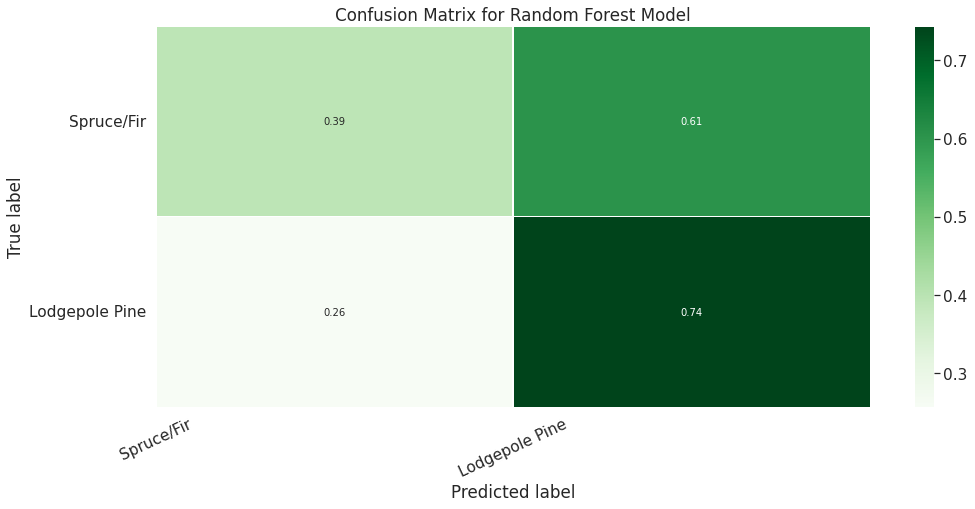

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6225697396493367


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42    172416
           1       0.70      0.74      0.72    326296

    accuracy                           0.62    498712
   macro avg       0.57      0.57      0.57    498712
weighted avg       0.61      0.62      0.62    498712



In [ ]:
clf.feature_importances_

array([1.85500907e-02, 1.58354382e-01, 1.42768483e-04, 2.00154392e-04,
       1.98699940e-02, 1.75728643e-04, 4.89275633e-03, 6.42280154e-03,
       1.11269578e-01, 6.53187807e-02, 1.87959809e-01, 2.23167765e-02,
       6.94886723e-03, 8.36164870e-03, 3.89215864e-01])

<BarContainer object of 15 artists>

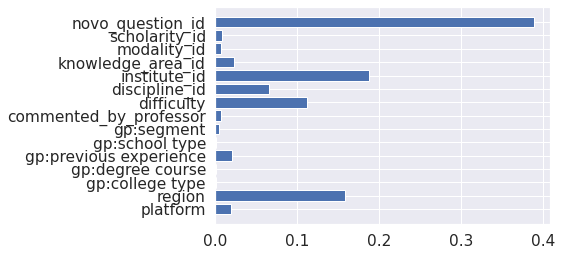

In [ ]:
plt.barh(df_model.columns, clf.feature_importances_)